### Dataset Information
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

### Problem Statement:
Check if the customers would default on their credit card payments or not
We have a binary classification problem

### Importing necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC                            #to make an SVM for classification 
from sklearn.model_selection import GridSearchCV       #for cross validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [3]:
#Reading the data set and creating a data frame
df = pd.read_csv("Data/UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

### Analysing all columns
We have a total of 25 features in our dataset

But one thing we can observe is that the "default.payment.next.month" is a huge name and should be converted into something precise

Also the ID column was randomly added and would not help in our prediction and analysis so we would get rid of it

In [4]:
df.rename({"default.payment.next.month":"DEFAULT"},axis=1, inplace=True)

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Identifying Missing Data

Let us explore the data types of all columns

In [7]:
df.dtypes

ID             int64
LIMIT_BAL    float64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_0          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
DEFAULT        int64
dtype: object

##### As per the data types, none of the features look our of place

LIMIT_BAL: Amount of given credit in NT dollars


SEX: Gender (
    1=male, 
    2=female)
    
    
EDUCATION: (
    1=graduate school, 
    2=university, 
    3=high school, 
    4=others,
    5=unknown, 
    6=unknown)
    
    
    
MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (
    -1=pay duly, 
    1=payment delay for one month, 
    2=payment delay for two months,
    8=payment delay for eight months, 
    9=payment delay for nine months and above)
    
PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

##### Let us dive into each feature and find if there is any missing or unwanted data in them

In [8]:
df['SEX'].unique()

array([2, 1], dtype=int64)

SEX contains only 2 types of values so we are good

In [9]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

For some reason EDUCATION contains 0 which is distinct from the allowed values specified above

Could it be a sign of missing data? Maybe. Maybe not

In [10]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

For some reason MARRIAGE also contains 0 which is distinct from the allowed values specified above

Could it be a sign of missing data?

There is no way for us to find out the usecase for 0s in our data. We could take helpmof the author but since that would be overkill for practice, we will be treating 0s as missing data and let us see how rich or poor our results are

We need to do something about these missing values

Let us start by finding the total number of rows with empty data

In [11]:
#return the columns that have either EDUCATION or MARRIAGE = 0
df.loc[(df['EDUCATION']==0) | (df['MARRIAGE']==0)]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
218,219,110000.0,2,3,0,31,0,0,0,0,...,73315.0,63818.0,63208.0,4000.0,5000.0,3000.0,3000.0,3000.0,8954.0,0
809,810,160000.0,2,2,0,37,0,0,0,0,...,28574.0,27268.0,28021.0,35888.0,1325.0,891.0,1000.0,1098.0,426.0,0
820,821,200000.0,2,3,0,51,-1,-1,-1,-1,...,780.0,390.0,390.0,0.0,390.0,780.0,0.0,390.0,390.0,0
1019,1020,180000.0,2,3,0,45,-1,-1,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1443,1444,200000.0,1,3,0,51,-1,-1,-1,-1,...,2529.0,1036.0,4430.0,5020.0,9236.0,2529.0,0.0,4430.0,6398.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28602,28603,200000.0,2,3,0,37,1,-1,-1,-1,...,4000.0,22800.0,5716.0,35000.0,5000.0,4000.0,22800.0,5716.0,0.0,0
28603,28604,110000.0,2,3,0,44,2,2,2,2,...,41476.0,42090.0,43059.0,2000.0,2000.0,1700.0,1600.0,1800.0,1800.0,1
28766,28767,80000.0,2,3,0,40,2,2,3,2,...,1375.0,779.0,5889.0,5000.0,0.0,0.0,885.0,5889.0,4239.0,0
29078,29079,100000.0,2,3,0,56,1,2,0,0,...,31134.0,30444.0,32460.0,0.0,1500.0,2700.0,0.0,2400.0,0.0,0


In [12]:
len(df.loc[(df['EDUCATION']==0) | (df['MARRIAGE']==0)]), len(df)

(68, 30000)

Since less than 1 % of our data has missing values, we can remove those rows and assume that it will not have any negative impact on our classification

In [13]:
#select all the rows that do not have EDUCATION or MARRIAGE = 0
df_with_no_missing_values = df.loc[(df['EDUCATION']!=0) & (df['MARRIAGE']!=0)]

In [14]:
df_with_no_missing_values.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [15]:
df_with_no_missing_values['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6], dtype=int64)

In [16]:
df_with_no_missing_values['MARRIAGE'].unique()

array([1, 2, 3], dtype=int64)

SVM is not good for classifying large data sets. Currently length of our dataset is 29932

29932 is long enough to consume a lot of time for cross validation so we can resample our data set to restrict to 1000 rows for each catergory of customers

In [17]:
df_no_default = df_with_no_missing_values[df_with_no_missing_values['DEFAULT'] == 0]
df_with_default = df_with_no_missing_values[df_with_no_missing_values['DEFAULT'] == 1]

Now we resample to include only 1000 values per data frame

In [18]:
df_no_default_downsampled = resample(df_no_default,
                                    replace=False,
                                    n_samples=1000,
                                    random_state=42)

In [19]:
len(df_no_default_downsampled)

1000

In [20]:
df_with_default_downsampled = resample(df_with_default,
                                    replace=False,
                                    n_samples=1000,
                                    random_state=42)

In [21]:
df_downsampled = pd.concat([df_no_default_downsampled, df_with_default_downsampled])

### Splitting data into dependent and independent features

X - Dependent Features (used to classify)

y - Independent features (to be classified)

In [22]:
X = df_downsampled.drop('DEFAULT', axis=1).copy()
y = df_downsampled['DEFAULT'].copy()
X.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

### One-hot Encoding

In [23]:
X_encoded = pd.get_dummies(X, columns=['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])

In [24]:
X_encoded.head()

,ID,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,642,130000.0,100143.0,50456.0,50000.0,0.0,0.0,0.0,2500.0,1000.0,...,0,1,0,0,0,0,0,0,0,0
4678,4679,170000.0,165027.0,168990.0,172307.0,35234.0,32869.0,33862.0,7200.0,7500.0,...,0,0,0,1,0,0,0,0,0,0
16004,16005,180000.0,25781.0,26000.0,26310.0,26662.0,26166.0,26176.0,1800.0,1800.0,...,0,0,0,1,0,0,0,0,0,0
22974,22975,210000.0,355.0,975.0,410.0,0.0,0.0,0.0,979.0,412.0,...,0,1,0,0,0,0,0,0,0,0
17535,17536,190000.0,76433.0,78472.0,80548.0,81778.0,83082.0,84811.0,3300.0,3331.0,...,0,0,0,1,0,0,0,0,0,0


### Centering and Scaling

Since we would be using the Radial Kernel for our SVM, the Radial Basis Function assumes that our data is centered and scaleed, having mean=0 and standard deviation=1

In [25]:
X_train, X_test,y_train,y_test = train_test_split(X_encoded, y, random_state=42)

In [26]:
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [27]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [28]:
y_test_2D = y_test.values.reshape(-1,1)
predictions = clf_svm.predict(X_test_scaled)

In [29]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

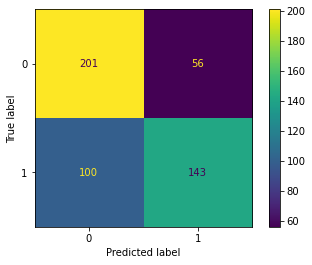

In [30]:
disp.plot()

From the confusion matrix, we can see that out of 257 records that did not default over their payments, 201 were correctly classified i. e. 79%

Out of 243 that defaulted on their payment, 100 were correctly classified i. e. 61%

Let's try improving our prediction

### Optimizing parameters using Cross Validation and Grid Search CV

For optimizing a SVM we need to find optimized values for gamma which is the paramter that sclaes the difference between two distinct points selected to determine the higher dimension of our data points.

We also need to optimize c, the regularization parameter

In [31]:
params = [
    {'C':[0.5,1,10,50,100],
    'gamma':['scale', 1, 2, 0.1, 0.01, 0.02, 0.001],
    'kernel':['rbf']}
]

In [32]:
optimized_parameters = GridSearchCV(SVC(),
                                   params,
                                   cv=5,
                                   scoring='accuracy')

In [33]:
optimized_parameters.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.5, 1, 10, 50, 100],
                          'gamma': ['scale', 1, 2, 0.1, 0.01, 0.02, 0.001],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [35]:
print(optimized_parameters.best_params_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


##### Now let us train our model again but this time we specify the (hopefully) optimal paramters

In [37]:
clf_svm = SVC(random_state=42, C=10, gamma=0.001)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=10, gamma=0.001, random_state=42)

In [38]:
predictions = clf_svm.predict(X_test_scaled)

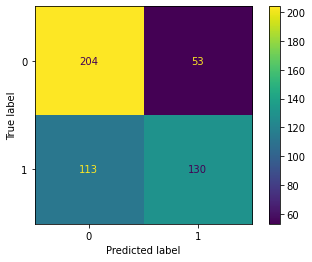

In [39]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

##### Our model improved only slightly, this time correctly classifying 3 more people who did not default and 13 more people who did default

We can make more tweaks to the parameters, maybe use a different kernel function to further optimize the model

But considering radian kernel gives us the best results, we can move ahead with our somewhat satisfactory results

Since I have just started implementing, I feel this is a step in the right direction to get familiar with the implementation of SVM